# Initialization

In [1]:
import os
import copy

# datetime
from datetime import datetime, timedelta
import time

# linear algebra
import numpy as np 
import scipy

# data processing
import pandas as pd 
from collections import defaultdict

# data visualization
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
sns.set()

In [3]:
# If using Google Colab
from google.colab import drive
BASE_PATH = '/content/drive'
# drive.mount(BASE_PATH)

PROJECT_PATH = os.path.join(BASE_PATH, "MyDrive","2021-09 Fall Semester","ECBM 4040 Neural Network Deep Learning","Project","recreating-residual-attention-network")
os.chdir(PROJECT_PATH)

Mounted at /content/drive


# Get Train Logs

In [ ]:
LOGS_DIR = 'data/logs'
all_logs = []

for csvf in os.listdir(LOGS_DIR):
    if csvf!="compiled.csv":
        temp_df = pd.read_csv(f"{LOGS_DIR}/{csvf}")
        temp_df['num_attention_layer'] = (csvf.split('-')[1][1:])
        temp_df['attention_learning_type'] = (csvf.split('-')[2]) if csvf.split('-')[2]=='nal' else 'arl'
        all_logs.append(temp_df)

In [ ]:
pd.concat(all_logs).reset_index(drop=True).to_csv(f"{LOGS_DIR}/compiled.csv", index=False)

# Visualization

In [4]:
LOGS_DIR = 'data/logs'
compiled_df = pd.read_csv(f"{LOGS_DIR}/compiled.csv")
compiled_df

,epoch,accuracy,loss,per_epoch_time,val_accuracy,val_loss,num_attention_layer,attention_learning_type
0,0,0.151500,2.459409,30.664114,0.1000,2.653756,56,arl
1,1,0.245475,2.094196,16.751616,0.1320,2.519365,56,arl
2,2,0.305200,1.915615,16.876043,0.2832,1.956981,56,arl
3,3,0.340750,1.819043,16.650647,0.3669,1.747778,56,arl
4,4,0.367125,1.758713,16.824753,0.3231,1.950580,56,arl
...,...,...,...,...,...,...,...,...
795,95,0.837250,0.480638,29.572921,0.8093,0.569097,92,arl
796,96,0.828550,0.501210,29.504795,0.7980,0.615956,92,arl
797,97,0.834900,0.489902,30.243861,0.8029,0.600394,92,arl
798,98,0.837750,0.475259,29.783043,0.8053,0.594774,92,arl


## Comparison of different attention layers and different learning types

In [7]:
# Training Time in hours
pd.pivot_table(compiled_df, values='per_epoch_time', index=['num_attention_layer'], columns=['attention_learning_type'], 
               aggfunc=(lambda x: np.sum(x)/3600))

attention_learning_type,arl,nal
num_attention_layer,,
56,0.469529,0.468860
92,0.841172,0.837912
128,1.182432,1.180756
164,1.552443,1.552835


In [ ]:
pd.pivot_table(compiled_df, values=['val_accuracy'], index=['num_attention_layer'], columns=['attention_learning_type'], aggfunc='max')

val_accuracy        
attention_learning_type          arl     nal
num_attention_layer                         
56                            0.8070  0.7978
92                            0.8106  0.8021
128                           0.7618  0.7366
164                           0.7570  0.7299

In [ ]:
compiled_df['val_error'] = 1-compiled_df['val_accuracy']
pd.pivot_table(compiled_df, values=['val_error'], index=['num_attention_layer'], columns=['attention_learning_type'], aggfunc='min')

val_error        
attention_learning_type       arl     nal
num_attention_layer                      
56                         0.1930  0.2022
92                         0.1894  0.1979
128                        0.2382  0.2634
164                        0.2430  0.2701

### Validation Loss

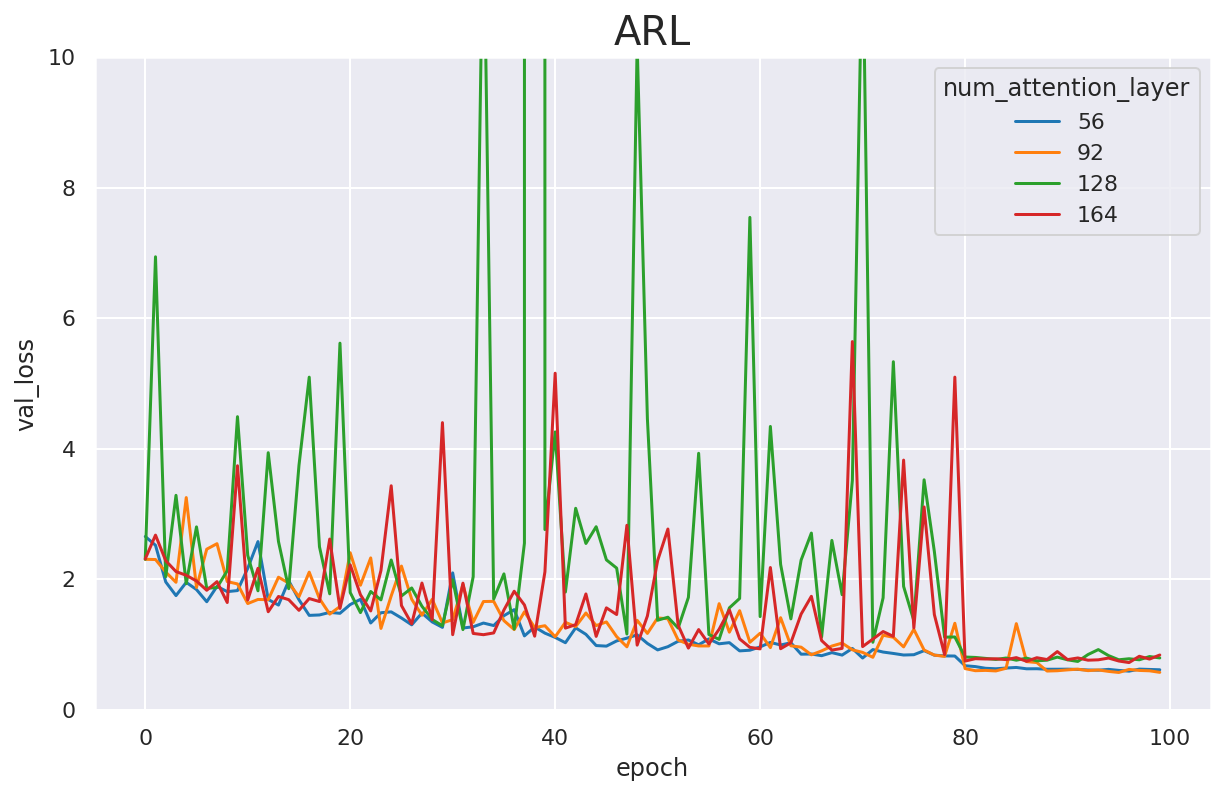

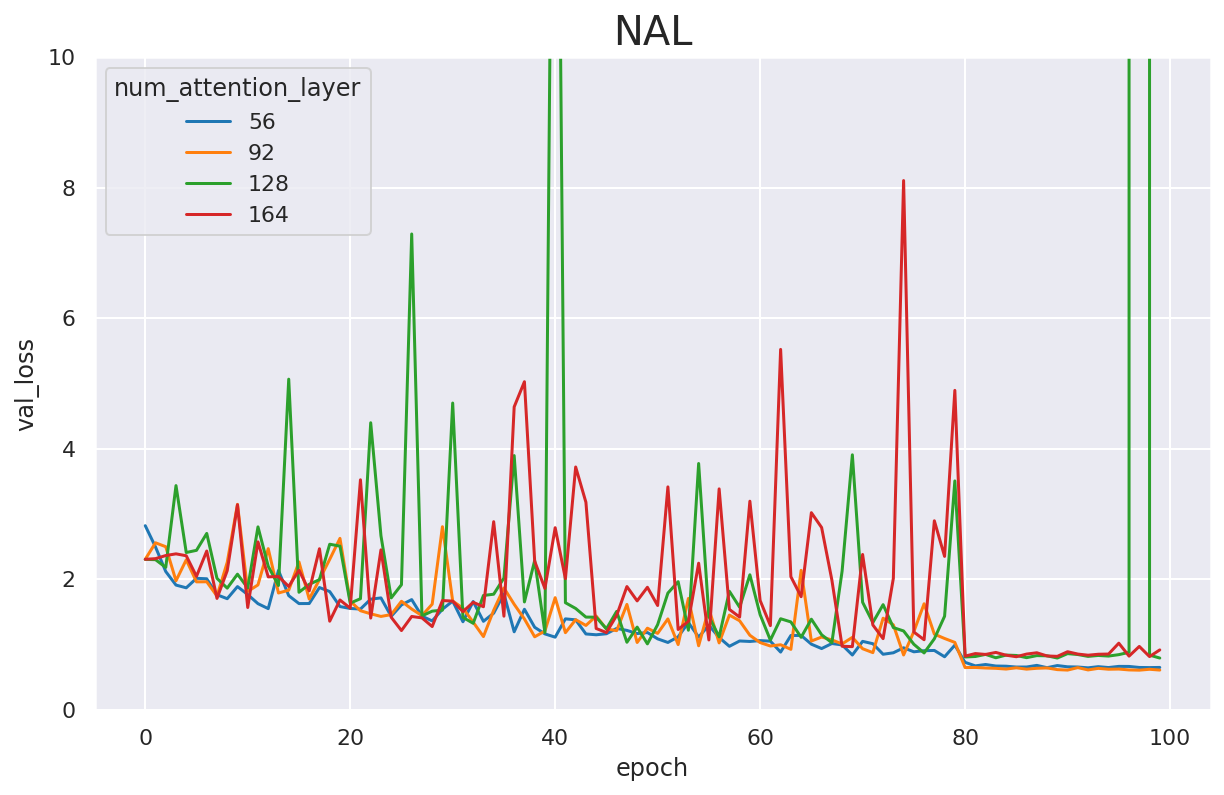

In [ ]:
for lt in ['arl', 'nal']:
    plt.figure(figsize=(10,6))
    ax = sns.lineplot(data=compiled_df[(compiled_df['attention_learning_type']==lt)], x='epoch', y='val_loss', hue='num_attention_layer', palette='tab10')
    ax.set_title(lt.upper(), fontsize=20)
    ax.set_ylim((0,10))
    plt.savefig(f'figures/{lt}-comparison-val_loss.png', dpi=500)

### Validation Accuracy

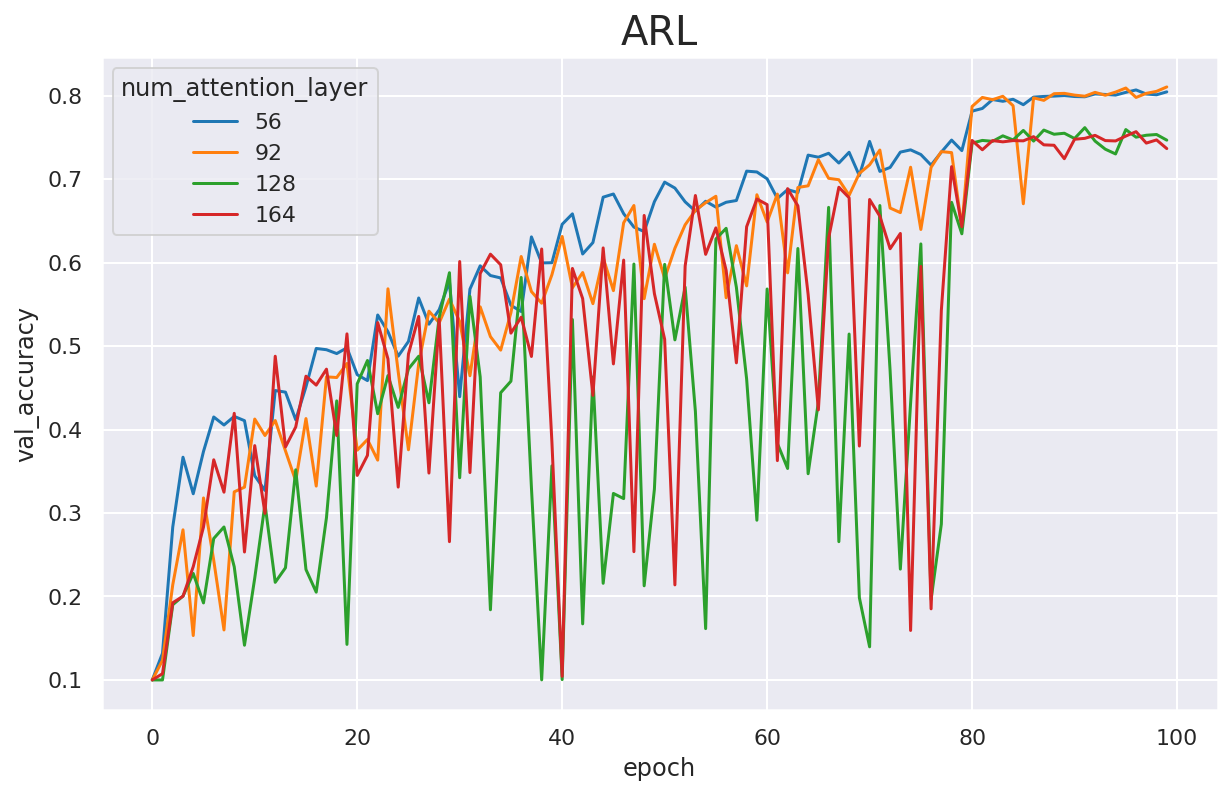

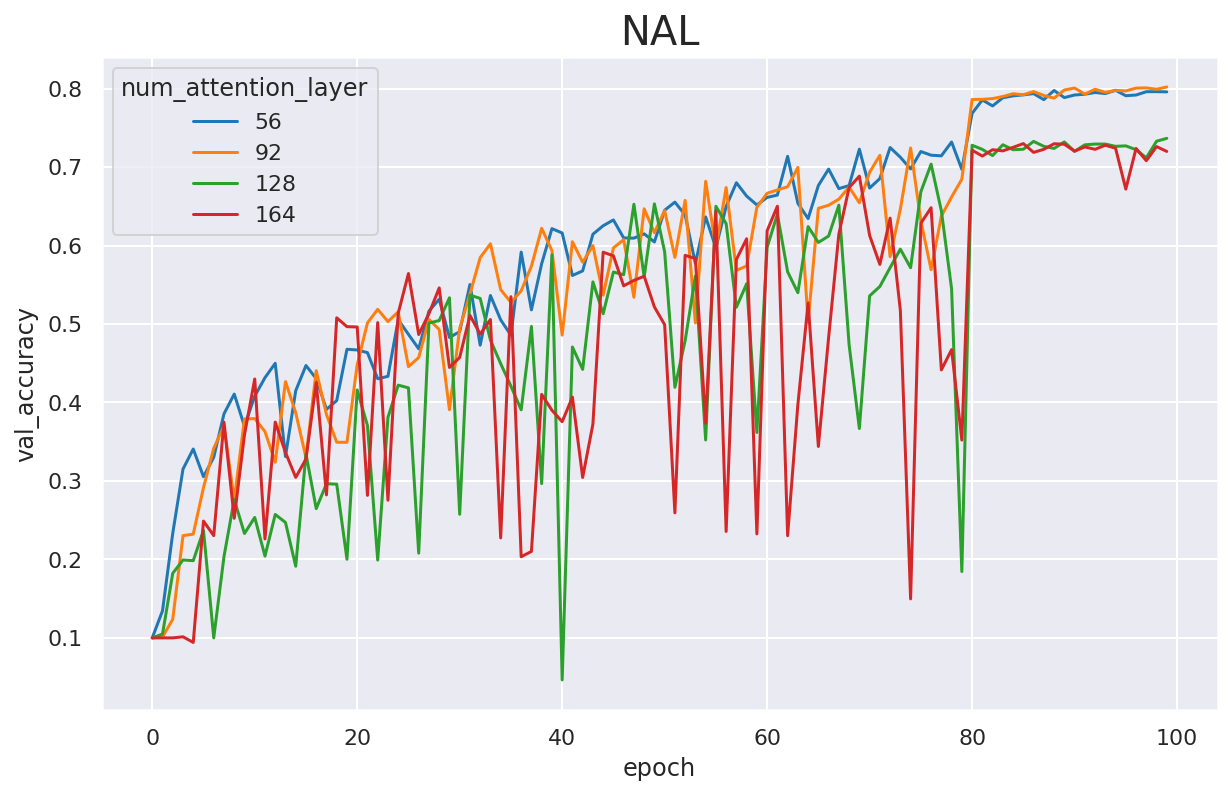

In [ ]:
for lt in ['arl', 'nal']:
    plt.figure(figsize=(10,6))
    ax = sns.lineplot(data=compiled_df[(compiled_df['attention_learning_type']==lt)], x='epoch', y='val_accuracy', hue='num_attention_layer', palette='tab10')
    ax.set_title(lt.upper(), fontsize=20)
    plt.savefig(f'figures/{lt}-comparison-val_acc.png', dpi=500)